In [227]:
import numpy as np
import pandas as pd
from datetime import datetime 
from datetime import timedelta
import csv 
import matplotlib.pyplot as plt
from datetime import date
from datetime import time

In [228]:
def convertTimeStamp(string):
    """Converts a string to a datetime object.
    """
    time = datetime.strptime(string,'%m/%d/%Y %I:%M:%S %p') #Accepts time string, converts it to datetime object.
    return time

In [229]:
#convert seconds to weeks, days, hours, minutes, seconds

intervals = (
    ('weeks', 604800),  # 60 * 60 * 24 * 7
    ('days', 86400),    # 60 * 60 * 24
    ('hours', 3600),    # 60 * 60
    ('minutes', 60),
    ('seconds', 1),
    )

def display_time(seconds, granularity=2):
    result = []

    for name, count in intervals:
        value = seconds // count
        if value:
            seconds -= value * count
            if value == 1:
                name = name.rstrip('s')
            result.append("{} {}".format(value, name))
    return ', '.join(result[:granularity])

In [230]:
def councilTime(filepath):
    """councilTime accepts a csv file and returns a dataframe which displays the average elapsed time between created date 
        and update date for service requests in each distinct council district."""
    
    dataframe = pd.read_csv(filepath)
    
    #filter unique CD values from the dataset
    dataframe1 = dataframe['CD'].dropna().unique()
    dataframe1 = np.sort(dataframe1)
    
    #filter dateset to CreatedDate and UpdatedDate columns
    created_df = dataframe['CreatedDate'].dropna().apply(convertTimeStamp, 0) #apply convertTimeStamp to CreatedDate
    updated_df = dataframe['UpdatedDate'].dropna().apply(convertTimeStamp, 0) #apply convertTimeStamp to UpdatedDate
    elapsed_df = updated_df - created_df #calculate the difference in the values in CreatedDate and UpdatedDate
    dataframe3 = [created_df, updated_df, elapsed_df] #combinedataframes created_df, updated_df, elapsed_df into one dataframe
    
   

    #insert elapsed time column into dataset
    dataframe.insert(3, "ElapsedTime", elapsed_df) #create column ElapsedTime with dataframe elapsed_df into dataframe dataframe
    
    elapsed_seconds = dataframe['ElapsedTime'].dt.total_seconds()
    dataframe.insert(4, 'ElapsedTime in Seconds', elapsed_seconds)
    
    df4 = dataframe[['CD', 'ElapsedTime', 'ElapsedTime in Seconds']] #create a dataframe df4 with columns CD and ElapsedTime from dataframe
    df4 = df4.sort_values('CD').dropna() #sort df4 by rows in column CD
    
    
    #create dataframes for each unique council region with ElapsedTime column
    for district in dataframe1:
        print('Elapsed Times in Council District', int(district))
        is_district =  df4['CD']==district
        df4_district = df4[is_district]
        
        district_col = df4_district['ElapsedTime']
        print(district_col)
        
        #find average elapsed time for each council region
        elapsed_avg = df4_district['ElapsedTime in Seconds'].mean()
        elapsed_avg = display_time(elapsed_avg, 5)

        print('\nAverage Elapsed Time for CD', int(district),':', elapsed_avg)
        print('\n\n')
    
    
    #create a scatter plot with x-axis CD number and y-axis Elapsed Time in Seconds
    ax = df4.plot(kind='scatter', y='CD', x='ElapsedTime in Seconds', s=1, figsize=(10,5), title='Elapsed Time vs CD')
    ax.set_xticklabels(df4['ElapsedTime in Seconds'])
    
    

Elapsed Times in Council District 1
585636    1 days 16:21:00
231737    0 days 18:16:00
572537    6 days 07:54:00
936125    0 days 00:06:00
936124    0 days 00:06:00
                ...      
278993    1 days 13:56:00
424570    0 days 00:01:00
444066    0 days 00:02:00
1202508   1 days 21:54:00
891437    2 days 02:00:00
Name: ElapsedTime, Length: 90158, dtype: timedelta64[ns]

Average Elapsed Time for CD 1 : 4.0 days, 21.0 hours, 50.0 minutes, 54.0 seconds



Elapsed Times in Council District 2
797796     5 days 03:49:00
859327     3 days 05:59:00
724192     2 days 21:54:00
758660     0 days 00:14:00
757152     1 days 16:03:00
                ...       
1230019    2 days 23:11:00
866714     0 days 00:04:00
11263     26 days 22:15:00
1240191    2 days 18:44:00
1240177    0 days 21:20:00
Name: ElapsedTime, Length: 94567, dtype: timedelta64[ns]

Average Elapsed Time for CD 2 : 5.0 days, 23.0 hours, 54.0 minutes, 51.0 seconds



Elapsed Times in Council District 3
526012    3 days 05:52:00

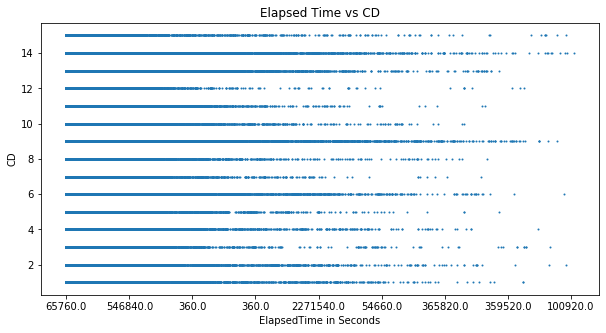

In [231]:
councilTime(r"C:\Users\hanaa\Downloads\MyLA311_Service_Request_Data_2019.csv")